# Author : Vaibhav Bichave
## Technical Task 2 : Prediction using Unsupervised ML (Level - Beginner)

In this task, we are going to predict the optimum number of clusters from the given iris dataset and represent it visually. This includes unsupervised learning.

The steps demonstrated in this notebook are:

 1. Loading the data
 2. Familiarizing with data
 3. Visualizing the data
 4. Optimum number of clusters using Elbow Method 
 5. Model Building & Training
 6. Cluster Visualisation
 7. Conclusion

## 1. Loading Data:

   The dataset is borrowed from https://bit.ly/3kXTdox . The overview of this dataset is, it has 150 samples with 6 features. Download the dataset from the link provided.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading data into dataframe

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Familiarizing with Data:
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Shape of dataframe

data.shape

(150, 6)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# describtion of dataset

data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

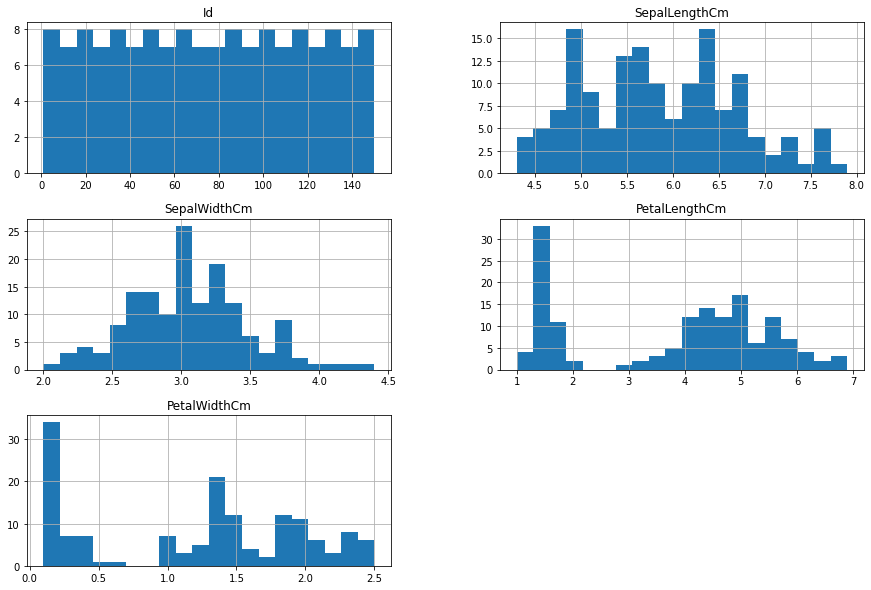

In [9]:
data.hist(bins = 20,figsize = (15,10))

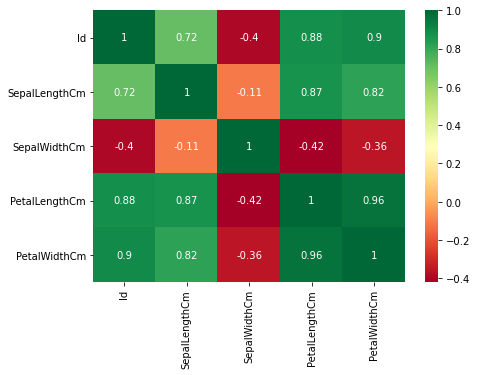

In [10]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True,cmap="RdYlGn")
plt.show()

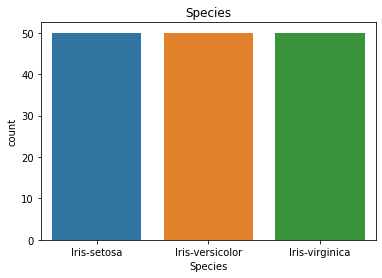

In [11]:
sns.countplot(x='Species',data=data)
plt.title('Species')
plt.show()

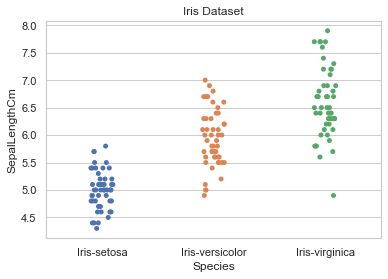

In [12]:
sns.set(style = 'whitegrid')
sns.stripplot(x ='Species',y = 'SepalLengthCm',data = data);
plt.title('Iris Dataset')
plt.show()

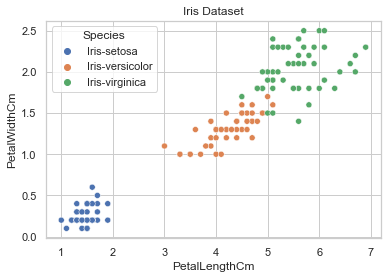

In [13]:
sns.set(style = 'whitegrid')
sns.scatterplot(x ='PetalLengthCm',y = 'PetalWidthCm',hue="Species",data = data);
plt.title('Iris Dataset')
plt.show()

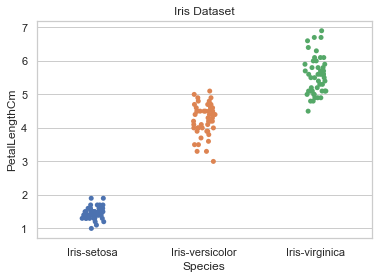

In [14]:
sns.set(style = 'whitegrid')
sns.stripplot(x ='Species',y = 'PetalLengthCm',data = data);
plt.title('Iris Dataset')
plt.show()

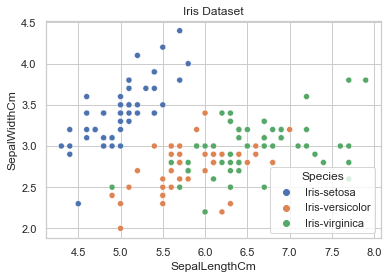

In [15]:
sns.set(style = 'whitegrid')
sns.scatterplot(x ='SepalLengthCm',y = 'SepalWidthCm',hue="Species",data = data);
plt.title('Iris Dataset')
plt.show()

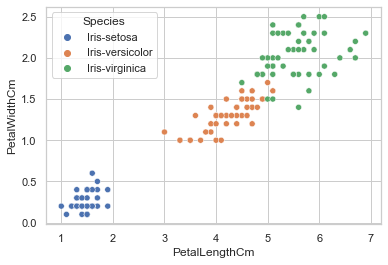

In [16]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=data)
plt.show()

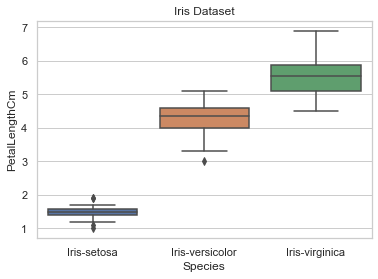

In [17]:
sns.boxplot(x='Species',y='PetalLengthCm',data=data)
plt.title("Iris Dataset")
plt.show()

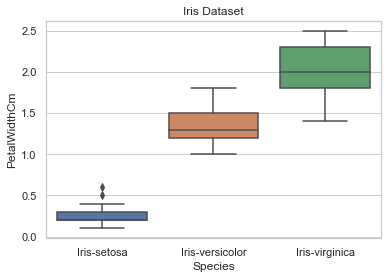

In [18]:
sns.boxplot(x='Species',y='PetalWidthCm',data=data)
plt.title("Iris Dataset")
plt.show()

## 4. Optimum number of clusters using Elbow Method :

In [26]:
# Finding the optimum number of clusters using k-means

x = data.iloc[:,[1,2,3,4]].values

#importing Kmean model
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    # appending the WCSS to the list 
    #(kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print('k:',i ,"-> wcss:",kmeans.inertia_)

k: 1 -> wcss: 680.8243999999996
k: 2 -> wcss: 152.36870647733915
k: 3 -> wcss: 78.94084142614601
k: 4 -> wcss: 57.317873214285726
k: 5 -> wcss: 46.535582051282034
k: 6 -> wcss: 38.930963049671746
k: 7 -> wcss: 34.31875322061191
k: 8 -> wcss: 29.95408642103723
k: 9 -> wcss: 27.992635739389623
k: 10 -> wcss: 25.94725937001596


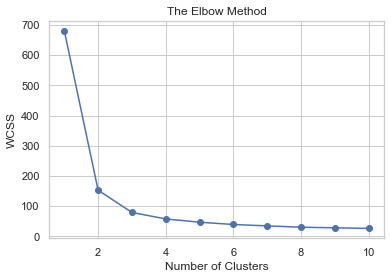

In [30]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## 5. Model Building & Training:

In [31]:
#importing Kmean model
from sklearn.cluster import KMeans

# Fitting K-Means to the Dataset 
k = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

# Returns a label for each data point based on the number of clusters
y = k.fit_predict(x)

print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [22]:
#Values of Centroids of clusters
k.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## 6. Cluster Visualisation:

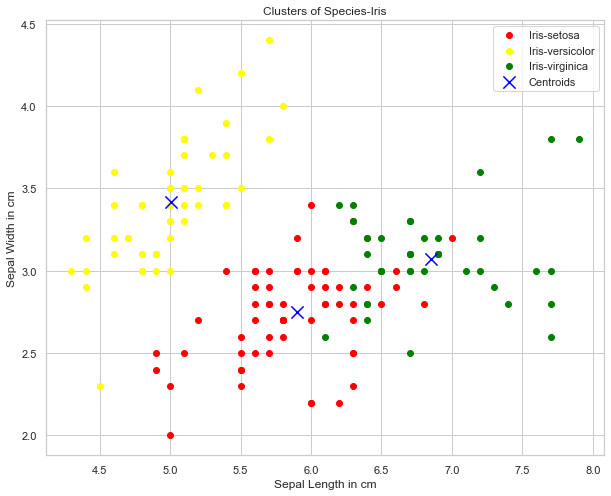

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(x[y==0,0], x[y==0,1], color='red', label='Iris-setosa')
plt.scatter(x[y==1,0], x[y==1,1], color='yellow', label='Iris-versicolor')
plt.scatter(x[y==2,0], x[y==2,1], color='green', label='Iris-virginica')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1], s=150,c='blue', label='Centroids',marker='x')
plt.title('Clusters of Species-Iris')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend()
plt.show()



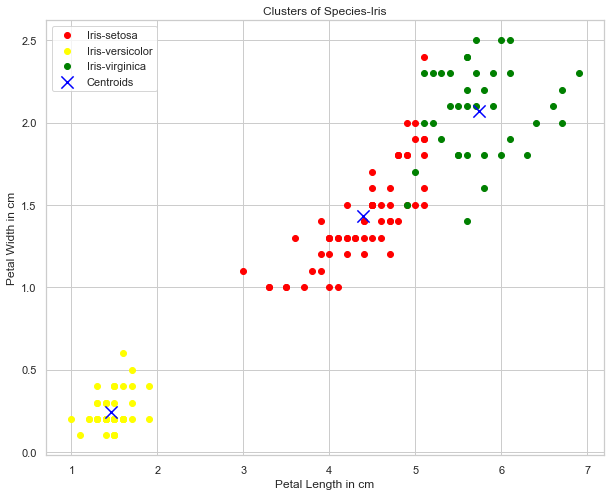

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(x[y==0,2], x[y==0,3], color='red', label='Iris-setosa')
plt.scatter(x[y==1,2], x[y==1,3], color='yellow', label='Iris-versicolor')
plt.scatter(x[y==2,2], x[y==2,3], color='green', label='Iris-virginica')
plt.scatter(k.cluster_centers_[:,2],k.cluster_centers_[:,3], s=150,c='blue', label='Centroids',marker='x')
plt.title('Clusters of Species-Iris')
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.legend()
plt.show()



## 7. Conclusion:
The final take away form this project is the working of K-mean model on a dataset and understanding the optimum number of clusters comes tobe 3 and we represent it visually.